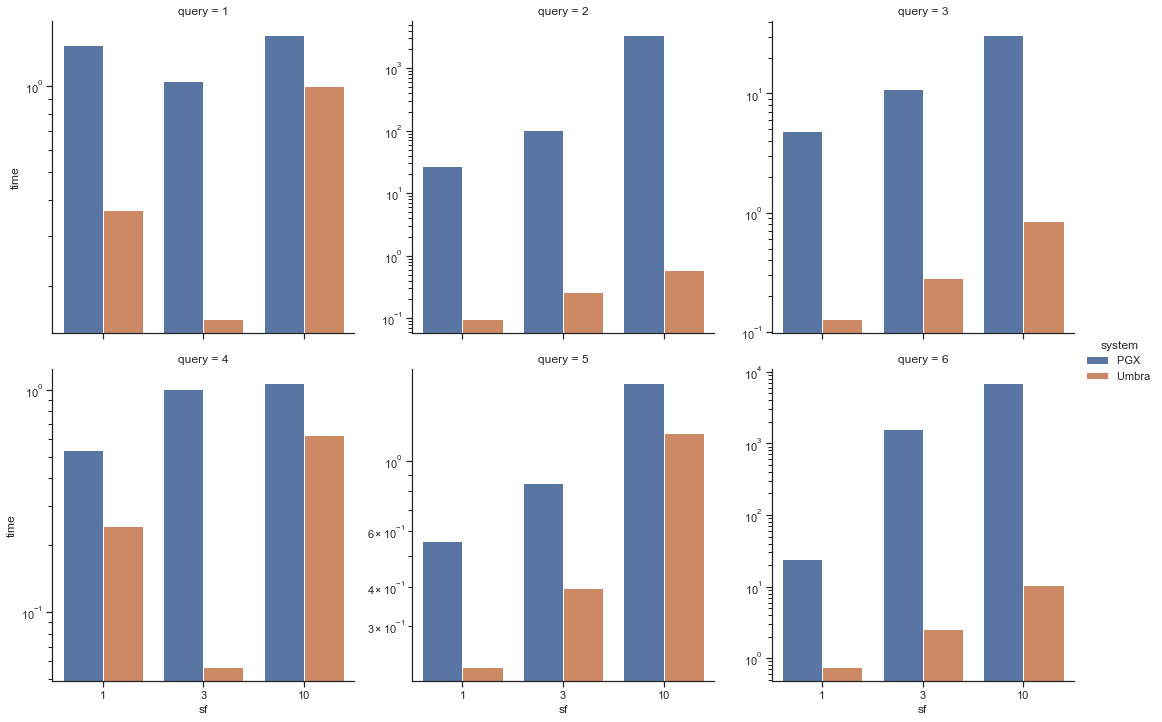

In [4]:
import pandas as pd
import seaborn as sns
import natsort as ns

df = pd.read_csv("results.csv", header=None, sep="\t",
                 names=["system", "variant", "sf", "query", "time", "result"],
                 dtype={"system": str, "variant": str, "sf": float, "query": int, "time": float, "result": int}
                )
df = df.fillna("")

df.system = df.system.str.cat(" " + df.variant)
df.system = pd.Categorical(df.system, ordered=True, categories=ns.natsorted(df.system.unique()))
df = df.sort_values(by=["system", "sf", "query"])

# use at most 1 significant digit for the scale factor
df.sf = df.sf.apply(lambda x: str(x).rstrip('0').rstrip('.'))

sns.set_theme(style="ticks")
g = sns.catplot(data=df, kind="bar", col="query", col_wrap=3,
                x="sf", y="time", hue="system",
                sharex=True, sharey=False, log=True)
g.savefig("results.png", dpi=300)